# Handwriting Recognition

## Importing libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator as IDG
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

## Loading MNIST data from keras.datasets

In [ ]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain, xTest = xTrain / 255.0, xTest / 255.0

11493376/11490434 [==============================] - 0s 0us/step


## Visualizing Data and Images

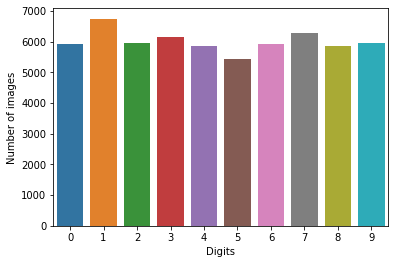

In [ ]:
unique, counts = np.unique(yTrain, return_counts=True)
data = {}
data['Digits'] = [i for i in unique]
data['Number of images'] = [i for i in counts]
df = pd.DataFrame(data)
sns.barplot(x='Digits', y='Number of images', data=df)

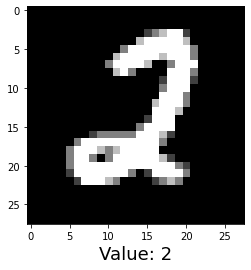

In [ ]:
def showIm(n):
    plt.imshow(np.array(xTrain[n]).reshape((28, 28)), cmap='binary_r')
    plt.xlabel(f"Value: {yTrain[n]}", fontsize=18)
    plt.show()

showIm(randint(0, 10000))

In [ ]:
# Data input is supposed to be (28, 28, 1)
xTrain = np.reshape(xTrain, (-1, 28, 28, 1))
print(xTrain.shape)

(60000, 28, 28, 1)


## Image Data Generation and tweaking parameters

In [ ]:
dataGeneration = IDG(
    rotation_range=20,
    zoom_range=0.2,
    rescale=1./255,
    validation_split=0.2
    width_shift_range=0.1,
    height_shift_range=0.1,
)

## Building model

In [ ]:
model = Sequential()

model.add(Conv2D(16, 8, input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# model.add(Conv2D(32, 6, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        1040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

## Model fitting

In [ ]:
trainDataGen = dataGeneration.flow(xTrain, yTrain, batch_size=64, subset='training')
valDataGen = dataGeneration.flow(xTrain, yTrain, batch_size=64, subset='validation')

model.fit(trainDataGen, validation_data=valDataGen, epochs=30)

Epoch 1/30
750/750 [==============================] - 47s 21ms/step - loss: 1.1686 - accuracy: 0.6192 - val_loss: 0.3889 - val_accuracy: 0.8877
Epoch 2/30
750/750 [==============================] - 16s 21ms/step - loss: 0.4178 - accuracy: 0.8666 - val_loss: 0.2013 - val_accuracy: 0.9368
Epoch 3/30
750/750 [==============================] - 16s 21ms/step - loss: 0.3259 - accuracy: 0.8972 - val_loss: 0.2521 - val_accuracy: 0.9237
Epoch 4/30
750/750 [==============================] - 16s 21ms/step - loss: 0.2836 - accuracy: 0.9091 - val_loss: 0.1634 - val_accuracy: 0.9512
Epoch 5/30
750/750 [==============================] - 16s 21ms/step - loss: 0.2526 - accuracy: 0.9194 - val_loss: 0.1387 - val_accuracy: 0.9555
Epoch 6/30
750/750 [==============================] - 16s 21ms/step - loss: 0.2408 - accuracy: 0.9262 - val_loss: 0.1977 - val_accuracy: 0.9408
Epoch 7/30
750/750 [==============================] - 15s 21ms/step - loss: 0.2302 - accuracy: 0.9277 - val_loss: 0.5828 - val_accuracy:

## Predicting on the test data

In [ ]:
pred = model.predict(np.reshape(xTest, (-1, 28, 28, 1)))
yPred = [np.argmax(x) for x in pred]

c = len(yPred)
for i in range(len(yPred)):
    if yPred[i] != yTest[i]:
        c -= 1

print(f"Predicted Accuracy on Test set: {c * 100 / len(yPred)}%")

Predicted Accuracy on Test set: 56.29%
